### Задача 1

Результат модели = цена проекта – затраты на проект. Сравнить количество новых займов до начала рассылки предложения и на данный момент. Также можно посчитать как много людей воспользовалось именно этим предложением чтобы выяснить, есть ли смысл в этой модели, ведь даже учитывая что ее цена не выливается компании в сильные растраты, возможен вариант, где эта модель будет бесполезна с точки зрения бизнеса.

### Задача 2

Создал таблицу для тренировки, назвал ее action

SELECT * FROM action
WHERE EXISTS (
    SELECT 1 FROM action a 
    WHERE 
        a.client_id = action.client_id 
        AND a.action_type <> action.action_type 
        AND TIMESTAMPDIFF(Second, a.created_at, action.created_at) < 10
);

### Задача 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,60,NaN,0
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,9500.0,5,0.00,1,0,5,20000,7,NaN,0
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,0.0,0,0.00,0,0,4,35000,94,NaN,0
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,0.0,13,0.00,0,1,3,35000,46,NaN,0


In [4]:
df['month_income'].describe()

count    23116.000000
mean     39363.189998
std      13887.644526
min          0.000000
25%      35000.000000
50%      35000.000000
75%      50000.000000
max      65000.000000
Name: month_income, dtype: float64

In [5]:
nap = df[(df['approved'] == 0)]
ap = df[(df['approved'] == 1)]

def compare(columnName):
    
    f, ax = plt.subplots(figsize=(10, 5))

    ax = sns.kdeplot(nap[columnName], ax=ax, color='tab:blue', label='Not Approved')
    ax = sns.kdeplot(ap[columnName], ax=ax, color='tab:orange', label='Approved')
    
    ax.set_xlabel("")
    ax.set_yticklabels('')
    ax.set_title(columnName + ' grouped by approved')
    ax.legend()

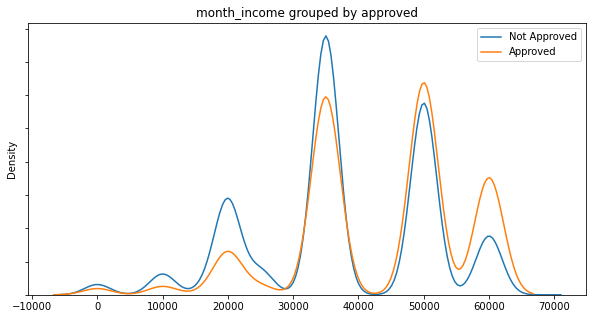

In [6]:
compare('month_income')

Вероятность одобрения кредита у людей с более высоким доходом выше, однако также выше и вероятность отказа

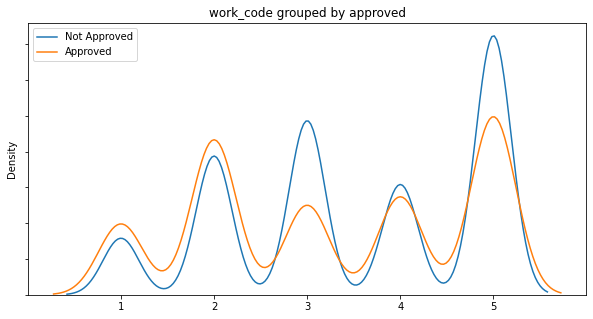

In [7]:
compare('work_code')

Можем видеть, госслужащим процент одобрения больше, довольно существенная разница у офисных работников, но у рабочих профессий все еще хуже

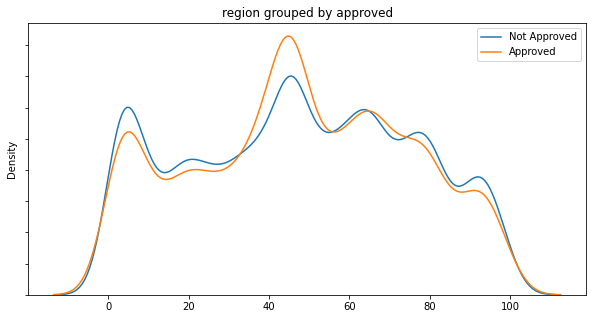

In [8]:
compare('region')

Не очень понятно, согласитесь?

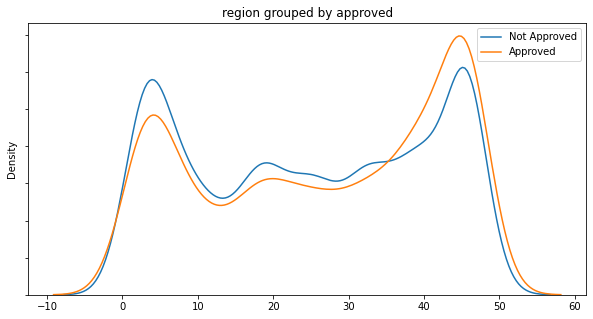

In [9]:
ap = ap[(ap['region'] < 50)]
nap = nap[(nap['region'] < 50)]
compare('region')

И еще немного сократим круг

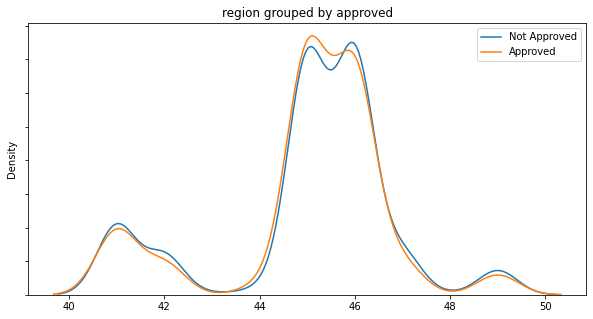

In [10]:
ap = ap[(ap['region'] > 40)]
nap = nap[(nap['region'] > 40)]
compare('region')

Получается, каком то смысле это зависит и от региона (больше всего одобрений в кировской и курганской областях (45, 46))

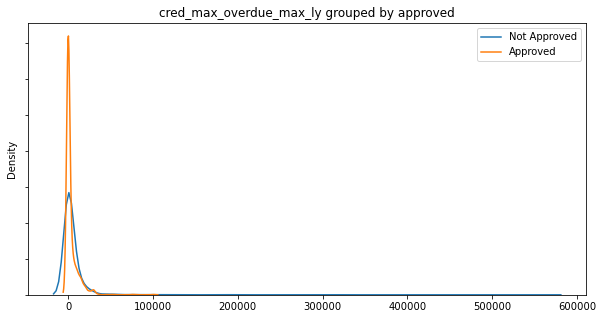

In [11]:
compare('cred_max_overdue_max_ly')

Максимальная просрочка у тех, кому кредит был одобрен.. Интересно настолько, насколько логично

In [12]:
df['isSolvent'] = df['month_income'] > 39363
df

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved,isSolvent
0,5498546,0.0,0,40364,0,0.0,3000,560,0.0,0.00,...,0,0.00,0,0,3,50000,46,NaN,0,True
1,5498604,1500.0,0,23456,0,0.0,0,9999,0.0,0.00,...,0,0.00,0,0,3,35000,17,NaN,0,False
2,5498609,0.1,0,17999,3,0.0,9999,9999,0.1,9999.00,...,0,0.00,0,2,3,35000,58,NaN,0,False
3,5498645,5000.0,0,313247,0,0.0,0,9999,0.0,0.00,...,0,4923.97,0,0,5,35000,4,NaN,0,False
4,5498647,0.0,0,0,1,0.0,0,9999,0.0,0.00,...,0,0.00,0,0,5,35000,34,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0.0,0,0,3,0.0,0,733,0.0,0.00,...,0,0.00,0,0,3,35000,60,NaN,0,False
23112,6697212,0.0,1,25400,3,9500.0,17750,49,0.0,0.00,...,5,0.00,1,0,5,20000,7,NaN,0,False
23113,6697215,1000.0,0,64490,2,0.0,1000,414,0.0,0.00,...,0,0.00,0,0,4,35000,94,NaN,0,False
23114,6697264,0.0,3,52080,0,7000.0,18132,15,0.0,5783.65,...,13,0.00,0,1,3,35000,46,NaN,0,False


<AxesSubplot:xlabel='month_income', ylabel='all_creds_count_all'>

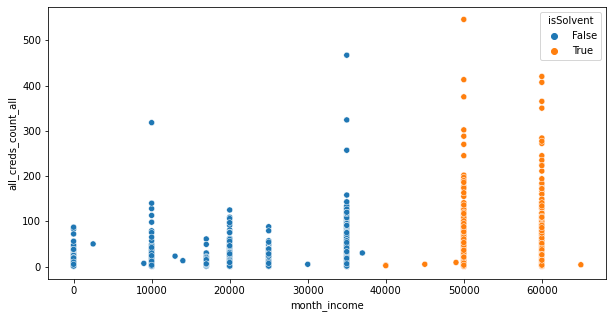

In [13]:
plt.subplots(figsize=(10, 5))
sns.scatterplot(x=df['month_income'], y=df['all_creds_count_all'], hue=df['isSolvent'])

Больше всего берут кредиты те, у кого доход ниже среднего (ожидаемо)

<AxesSubplot:xlabel='region', ylabel='all_creds_count_all'>

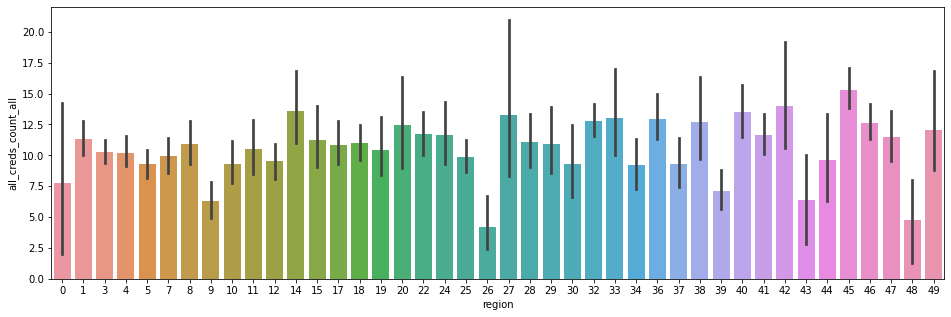

In [14]:
reg1 = df[(df['region'] < 50)]
reg2 = df[(df['region'] > 50)]
plt.subplots(figsize=(16, 5))
sns.barplot(x=reg1['region'], y=reg1['all_creds_count_all'])

<AxesSubplot:xlabel='region', ylabel='all_creds_count_all'>

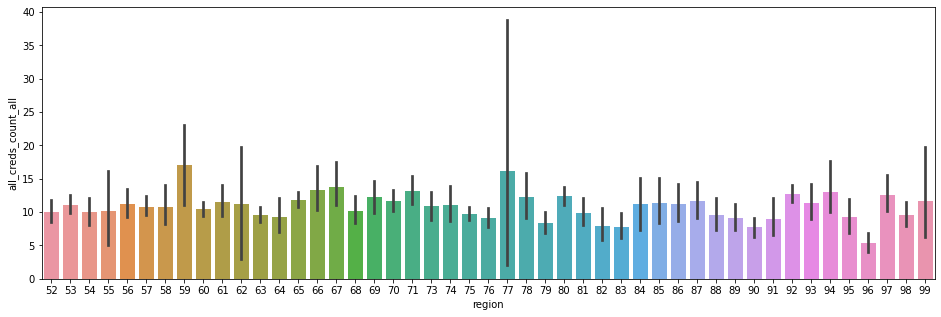

In [15]:
plt.subplots(figsize=(16, 5))
sns.barplot(x=reg2['region'], y=reg2['all_creds_count_all'])

Ребята из Москвы любят гораздо кредиты сильнее остальных, чуть ли не в 2 раза :)

Меня заинтересовал 26 регион

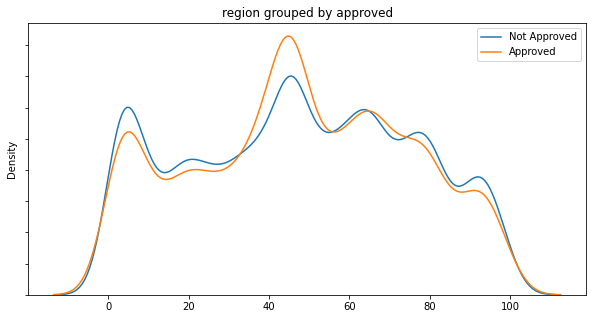

In [16]:
nap = df[(df['approved'] == 0)]
ap = df[(df['approved'] == 1)]
compare('region')

Средний процент одобрения несмотря на минимум кредитов, как думаете, какой у них доход?

<AxesSubplot:ylabel='month_income'>

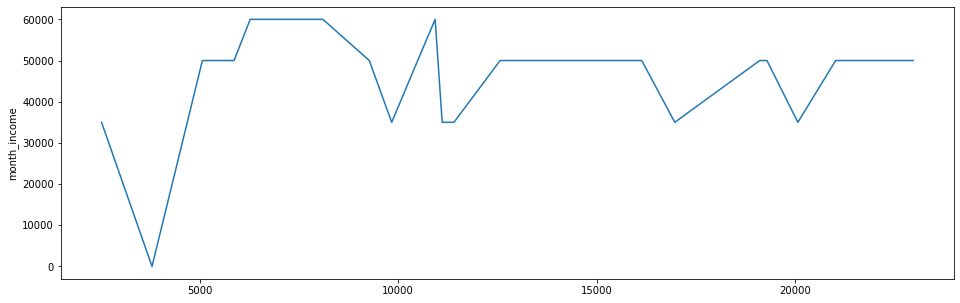

In [17]:
st = df[(df['region'] == 26)] #st - Ставропольский край
plt.subplots(figsize=(16, 5))
sns.lineplot(data=st['month_income'])

In [18]:
st['month_income'].mean()

44761.90476190476

Их доход выше среднего, думаю это и есть причина в столь хорошей кредитной истории - они в них не сильно нуждаются

PS. Очень много данных, при желании можно весь день сидеть придумывая новые и новые интересные инсайты, только не думаю что у Вас есть время и желание рассматривать подробно каждый график каждого кандидата) Считаю, графиков выше хватит чтоб составить общую картину о моих знаниях